## **Municipal Waste Management Cost Prediction**

### **Project Overview**
Municipal waste, often referred to as solid waste or trash, comprises various types of non-hazardous waste materials generated by households, businesses, and institutions within urban areas. These materials include but are not limited to paper, cardboard, plastic, glass, metal, food scraps, textiles, and yard waste. Proper management of municipal waste is crucial to maintaining clean and sustainable urban environments, as well as to minimize the environmental impact associated with waste disposal.

#### **Problem Statement**
The problem at hand is to develop an accurate and robust predictive model for municipal waste management costs in different geographic regions. Municipalities and waste management authorities need to efficiently allocate resources and plan their budgets to ensure effective waste collection, recycling, and disposal services. Predicting waste management costs is essential for making informed decisions, optimizing operations, and managing financial resources effectively.

##### **Project Objectives**
The objectives of this project is therefore:
1. To predict the cost associated with municipal waste management in the region based on various factors such as population, land area, and type of waste.
2. Conduct a comparative analysis between geo regions by the cost of waste management and the waste composition. 

In [1]:
# Installing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [2]:
# Loading the dataset 
data = pd.read_csv("public_data_waste_fee.csv")
data.head()

,region,province,name,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,wden,urb,fee,d_fee,sample,organic,paper,glass,wood,metal,plastic,raee,texile,other,msw_so,msw_un,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
0,Emilia_Romagna,Ferrara,Comacchio,502.250000,129.270004,66.419998,38006,283.750000,22648,1.0,0.0,1.0,79.816742,119671.476562,2.0,PAYT,1,1,NaN,4.363508,3.592508,2.269844,0.462317,1.131815,0.346470,0.112243,3.199499,20396261.0,13560520,33956781,60.07,3.0,285.0,33.105049,15.233530,7.269942,4.354818,9.438692,7.488041
1,Emilia_Romagna,Ferrara,Lagosanto,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,0.0,1.0,143.786301,70030.984375,3.0,PAYT,1,1,35.040904,9.887817,9.518352,4.001796,1.860965,4.643623,1.608505,0.351429,9.019776,1831407.0,580460,2411867,75.93,3.0,11.0,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284
2,Emilia_Romagna,Ferrara,Goro,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,0.0,1.0,146.318558,81116.523438,3.0,PAYT,1,1,37.377010,11.991079,6.653014,0.000013,0.744725,5.224834,NaN,0.449308,16.040081,1694922.0,464400,2159322,78.49,3.0,49.0,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891
3,Emilia_Romagna,Ferrara,Mesola,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,0.0,1.0,84.697502,43320.460938,3.0,PAYT,1,1,45.310474,9.762878,7.551381,0.148580,0.746540,5.202531,NaN,0.400064,9.769176,2881055.0,770860,3651915,78.89,3.0,165.0,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,0.0,1.0,341.540619,201565.265625,2.0,STANDARD,0,0,0.428440,6.601569,4.334883,2.296731,0.103101,5.120555,0.275157,0.287387,4.052555,3026700.0,4169180,7195880,42.06,1.0,60.0,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867


#### **Data Understanding**

In [3]:
# Define a class to understand the dataset

class Describer:

    # initialize object

    def __init__(self, data):
        self.data = data
        
    # method to check shape of data

    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.data.shape[0]} rows\n\t* {self.data.shape[1]} columns", '\n')
        return out
        
    # method to check info on the dataset

    def data_info(self):
        out = print(self.data.info(), '\n')
        return out

    # method to describe numerical columns

    def data_describe(self):
        out = self.data.describe()
        return out

    # method to check data types

    def data_type(self):

        print("Data has",len( data.select_dtypes(include='number').columns),
                "Numeric columns")

        print("and", len(data.select_dtypes(include='object').columns),
          "Categorical columns")

        print('_________________________')

        print('Numerical Columns:', data.select_dtypes(include='number').columns)
        print('Categorical Coulumns:', data.select_dtypes(include='object').columns)

        return None

    # check duplicates
    def check_duplicates(self):
        duplicates = []

        for i in data.duplicated():
            duplicates.append(i)
        duplicates_set = set(duplicates)
        if(len(duplicates_set) == 1):
            print('The Dataset has No Duplicates')

        else:
            duplicates_percentage = np.round(((sum(duplicates)/len(data)) * 100 ), 2)
            print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')

        return None
    
    # check missing values
    def missing_values(self):
        if self.data.isnull().any().any() == False:
            return "There Are No Missing Values"
        else:
            missing_values = self.data.isnull().sum().sort_values(ascending=False)
            missing_val_percent = ((self.data.isnull().sum() / len(self.data)) * 100).sort_values(ascending=False)
            missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})
            return missing_df[missing_df['Percentage %'] > 0]

In [4]:
#  creating an instance of the class describer
describe_data = Describer(data)

# view the shape of the data
describe_data.shape()

# view the info of the data
describe_data.data_info()

The DataFrame has:
	* 4341 rows
	* 39 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4341 entries, 0 to 4340
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      4341 non-null   object 
 1   province    4341 non-null   object 
 2   name        4335 non-null   object 
 3   tc          4341 non-null   float64
 4   cres        4289 non-null   float64
 5   csor        4274 non-null   float64
 6   istat       4341 non-null   int64  
 7   area        4335 non-null   float64
 8   pop         4341 non-null   int64  
 9   alt         4335 non-null   float64
 10  isle        4335 non-null   float64
 11  sea         4335 non-null   float64
 12  pden        4335 non-null   float64
 13  wden        4335 non-null   float64
 14  urb         4335 non-null   float64
 15  fee         4341 non-null   object 
 16  d_fee       4341 non-null   int64  
 17  sample      4341 non-null   int64  
 18  organic     3829 non

In [5]:
# describe data types
describe_data.data_type()

# describe numerical cols
describe_data.data_describe()

# check for duplicates
describe_data.check_duplicates()

# check for missing values
print("Dataframe showing the missing values:")
describe_data.missing_values()

Data has 35 Numeric columns
and 4 Categorical columns
_________________________
Numerical Columns: Index(['tc', 'cres', 'csor', 'istat', 'area', 'pop', 'alt', 'isle', 'sea',
       'pden', 'wden', 'urb', 'd_fee', 'sample', 'organic', 'paper', 'glass',
       'wood', 'metal', 'plastic', 'raee', 'texile', 'other', 'msw_so',
       'msw_un', 'msw', 'sor', 'geo', 'roads', 's_wteregio', 's_landfill',
       'gdp', 'proads', 'wage', 'finance'],
      dtype='object')
Categorical Coulumns: Index(['region', 'province', 'name', 'fee'], dtype='object')
The Dataset has No Duplicates
Dataframe showing the missing values:


,Missing Values,Percentage %
wood,1095,25.224603
texile,1013,23.335637
organic,512,11.794517
roads,443,10.205022
proads,443,10.205022
gdp,386,8.891960
finance,386,8.891960
raee,314,7.233356
s_landfill,285,6.565308
s_wteregio,285,6.565308


While there are no duplicates in the data, there are missing values in several columns in the dataset.
The code below is looking to identify whether there are any outliers in the dataset, and boxplots are used to visualise the presence of it.

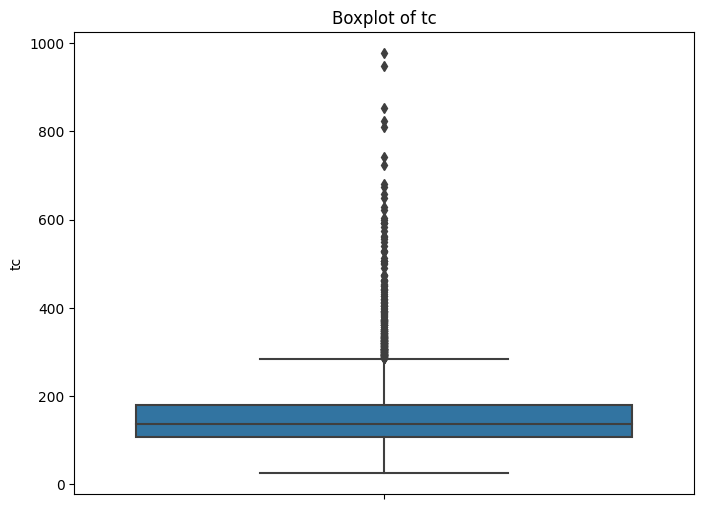

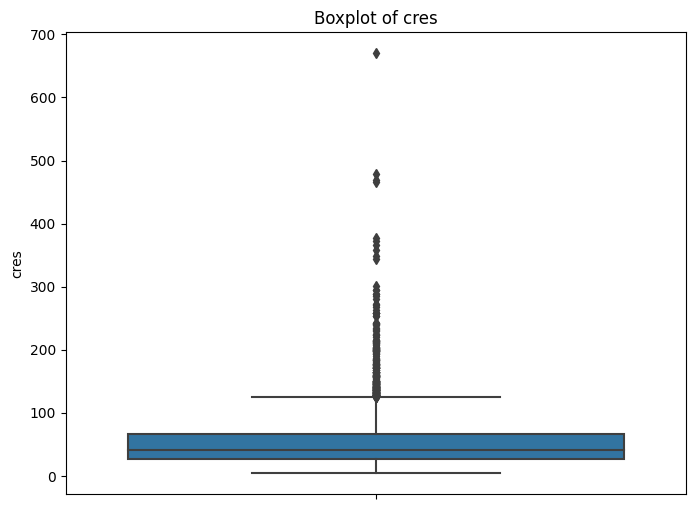

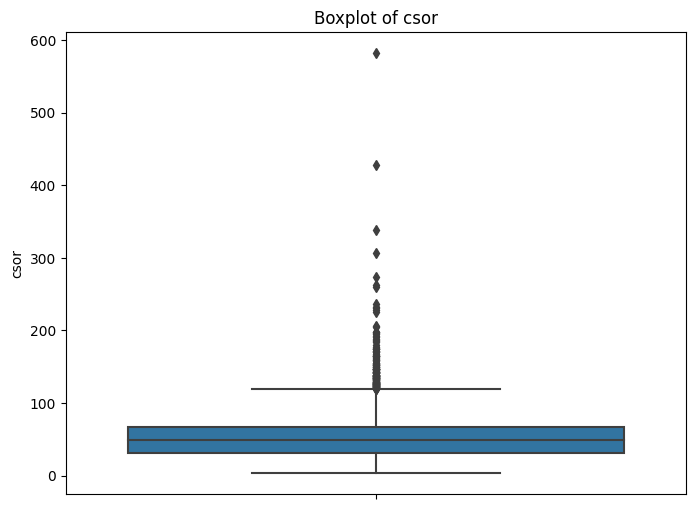

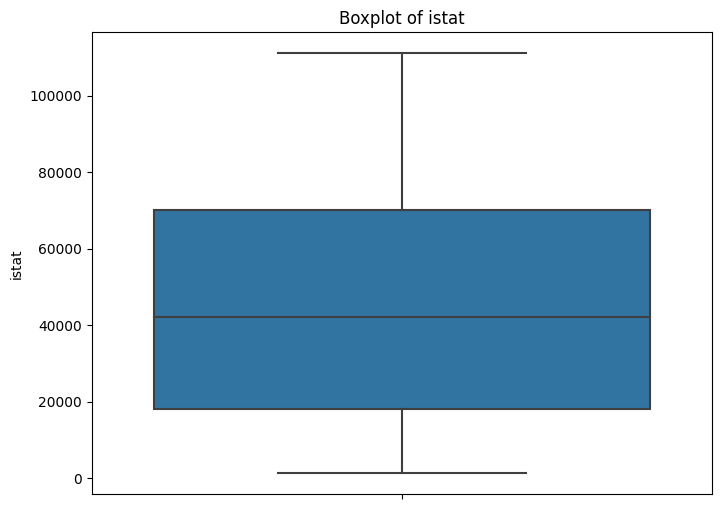

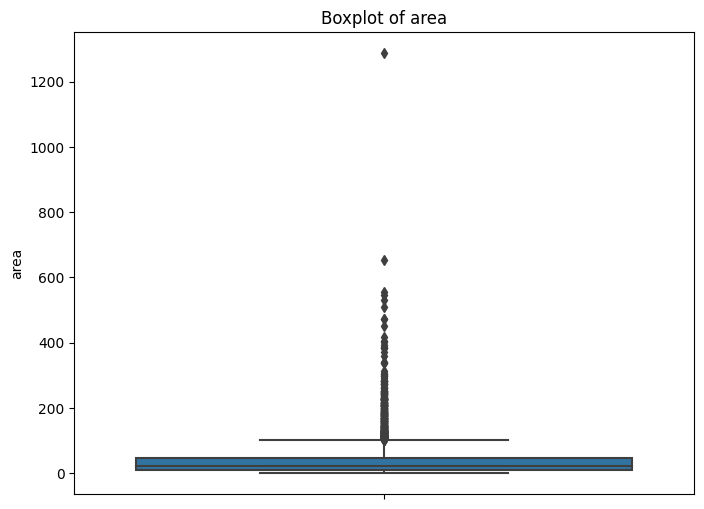

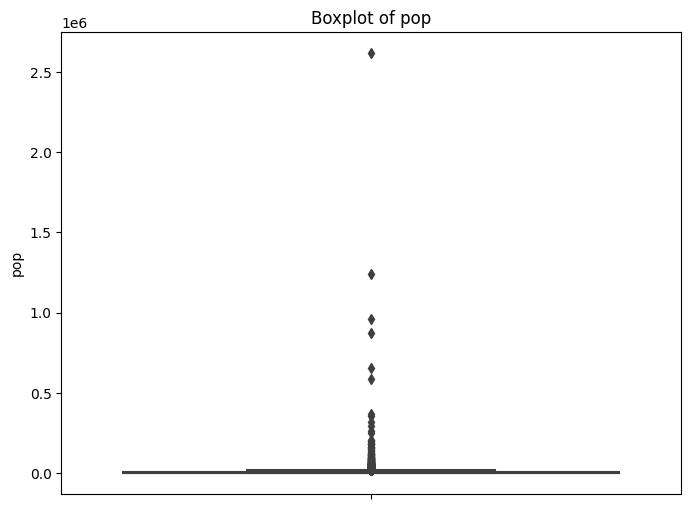

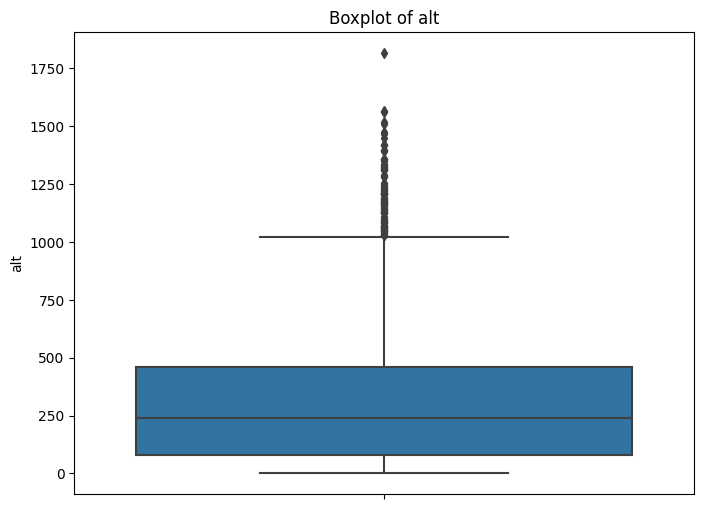

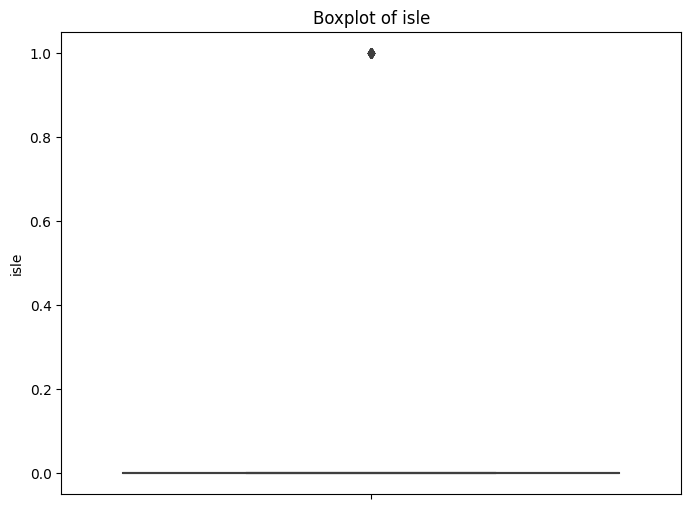

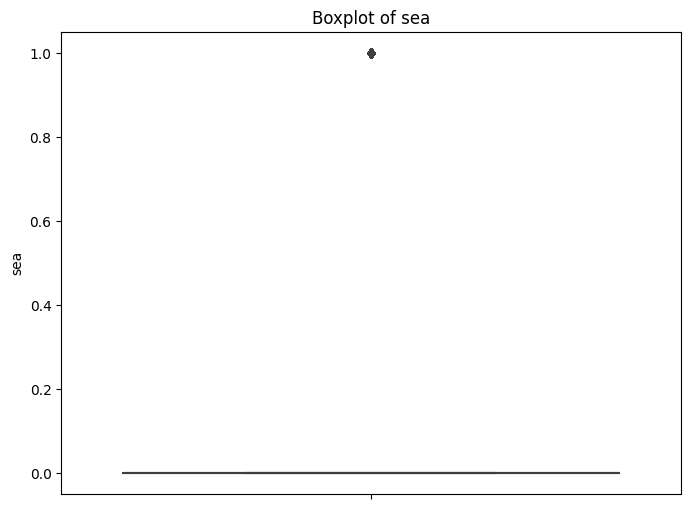

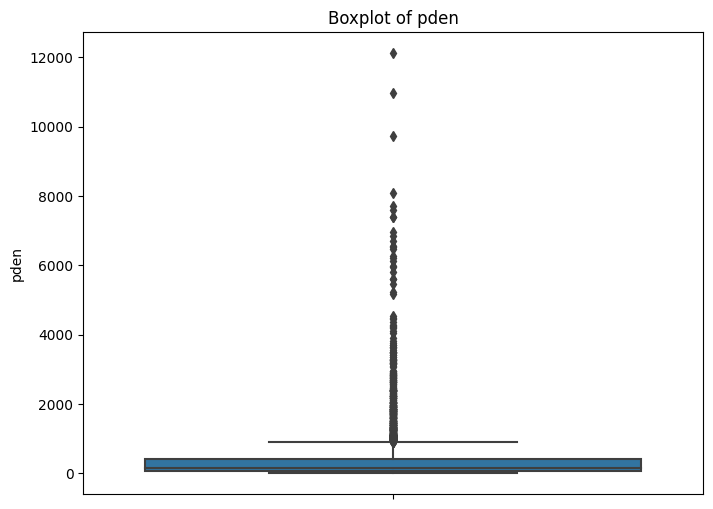

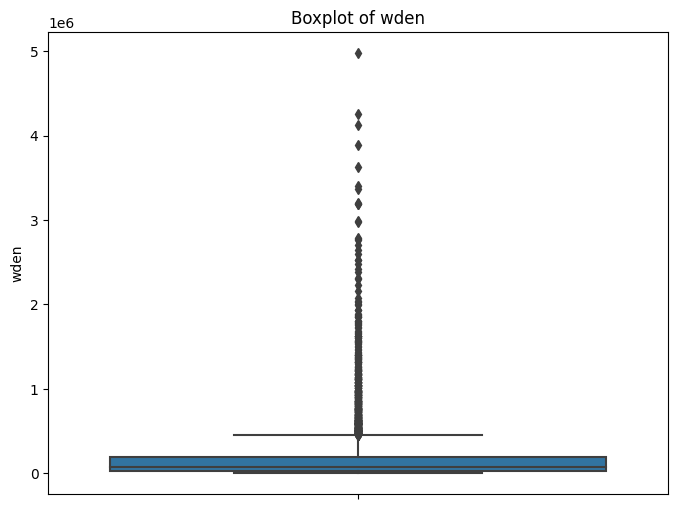

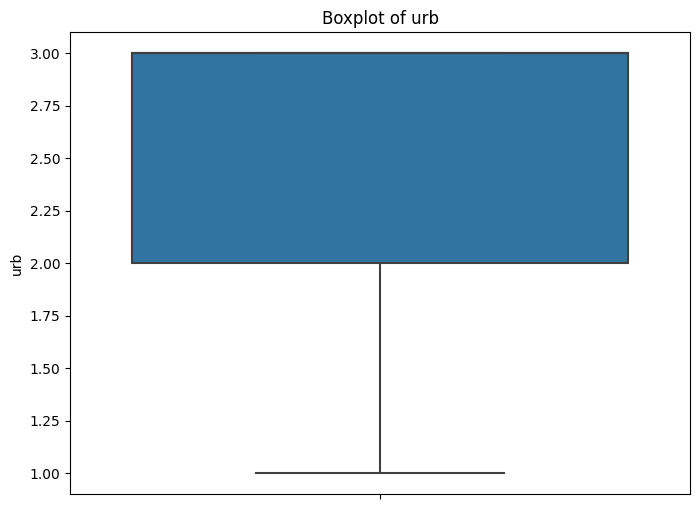

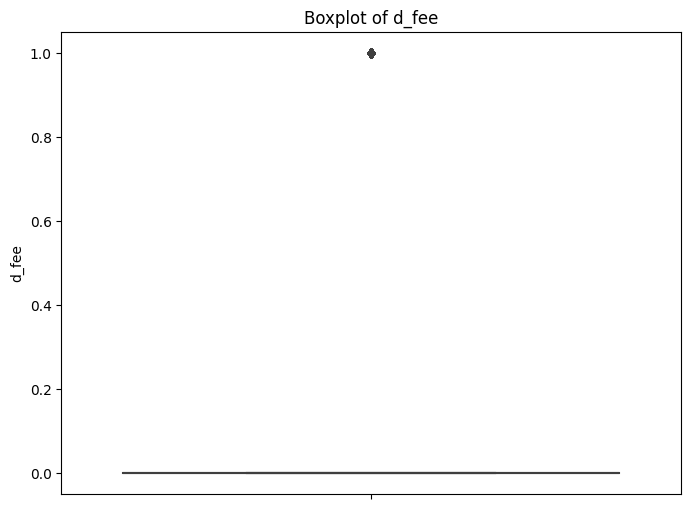

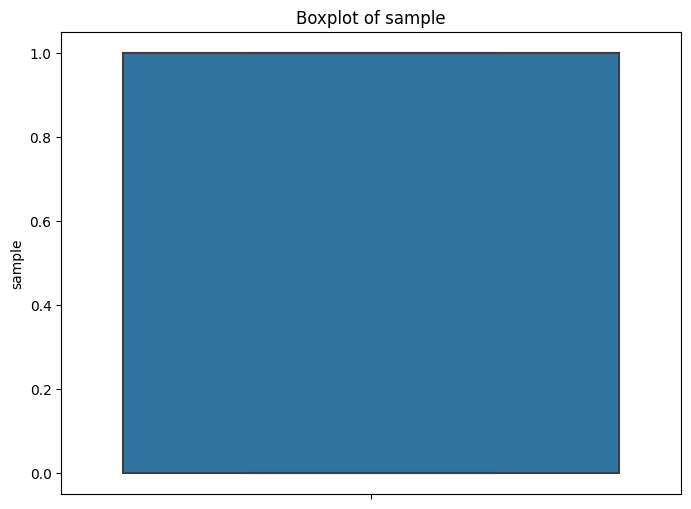

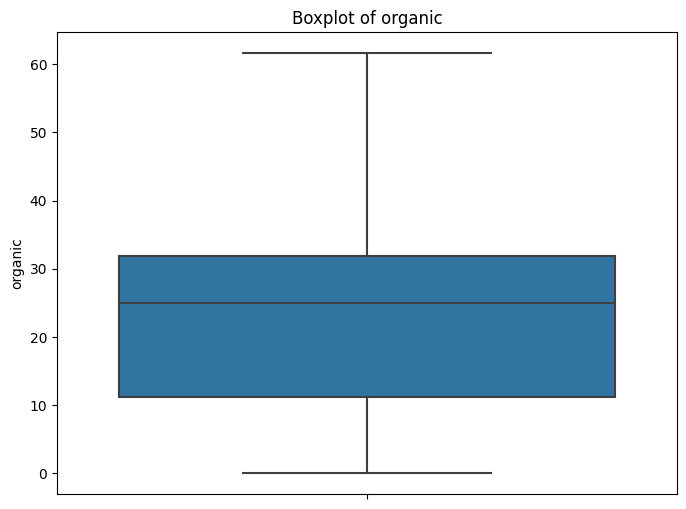

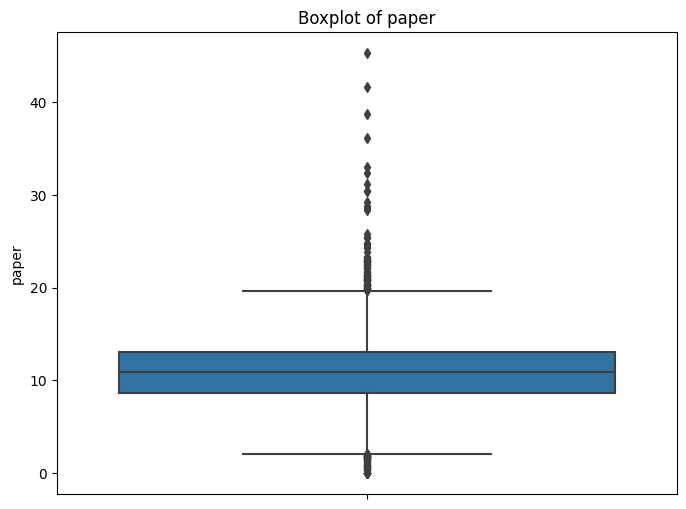

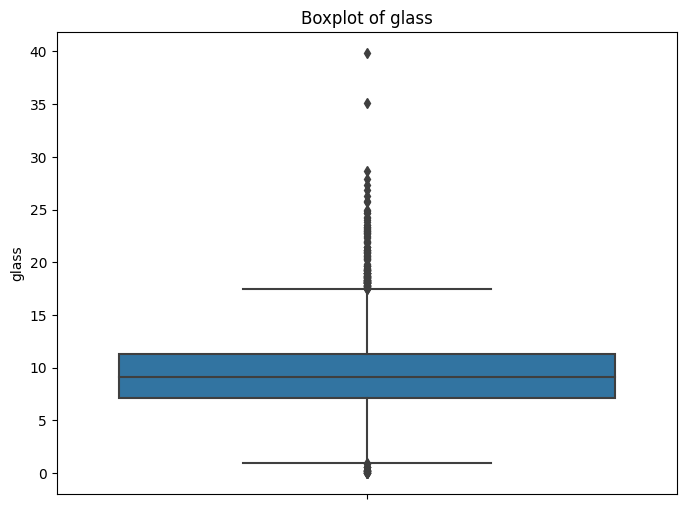

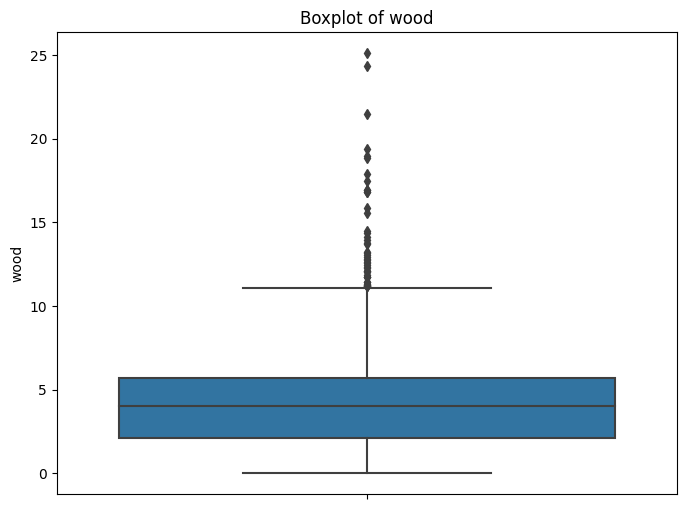

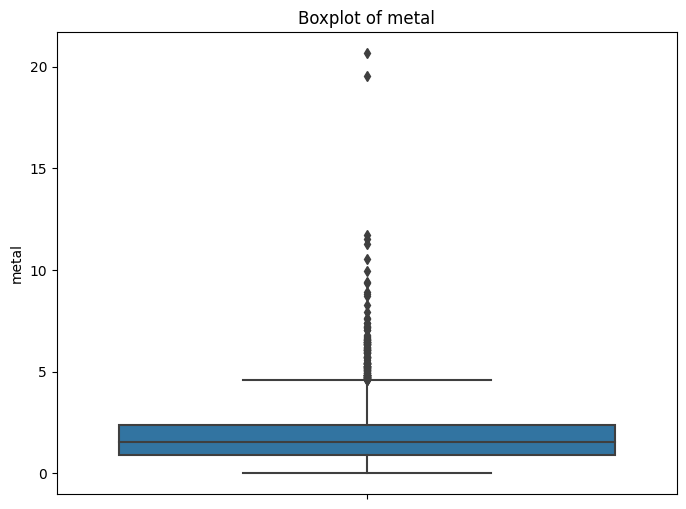

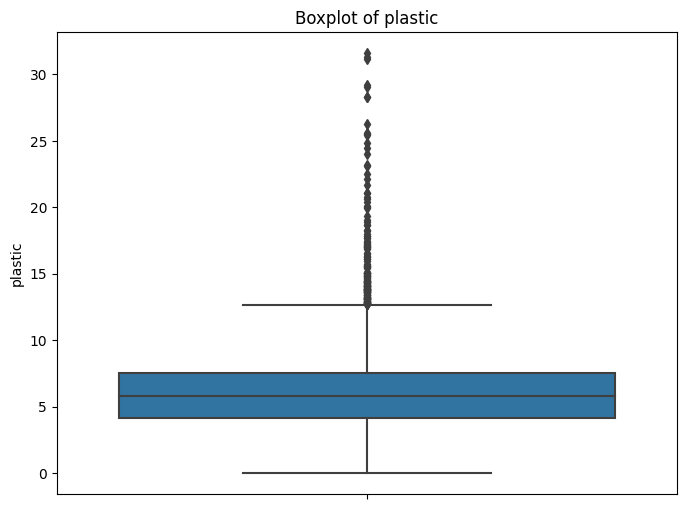

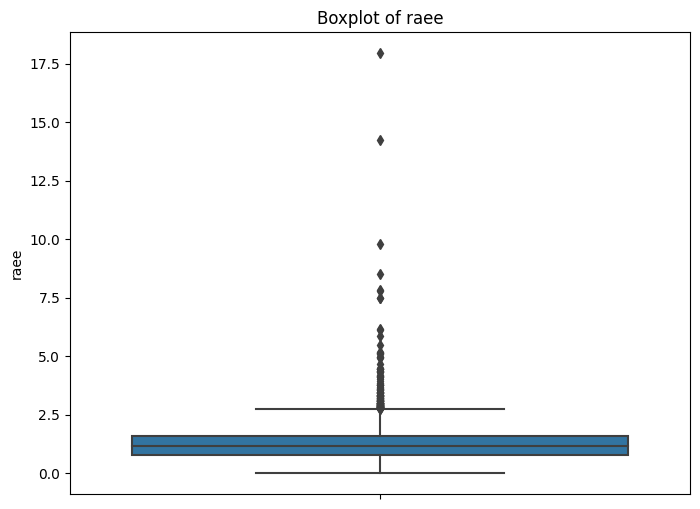

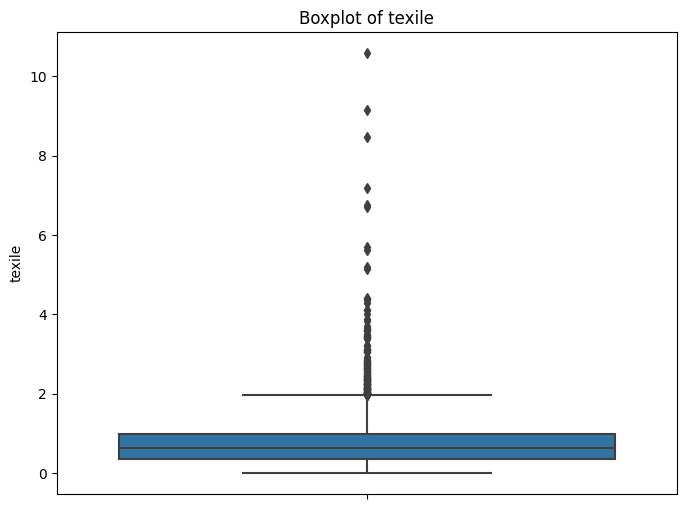

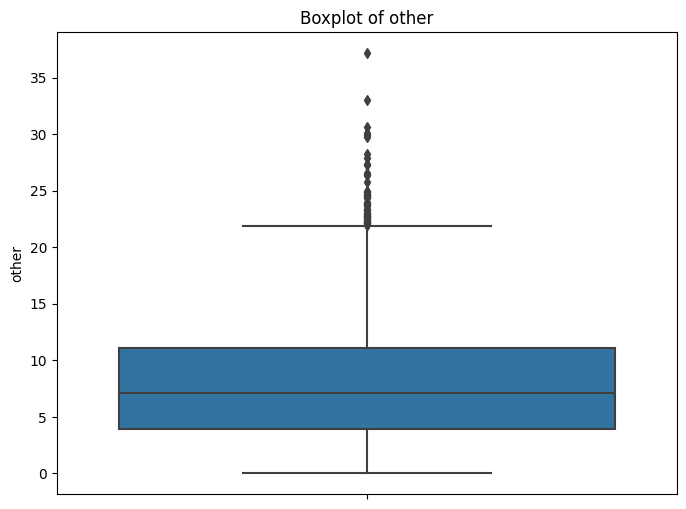

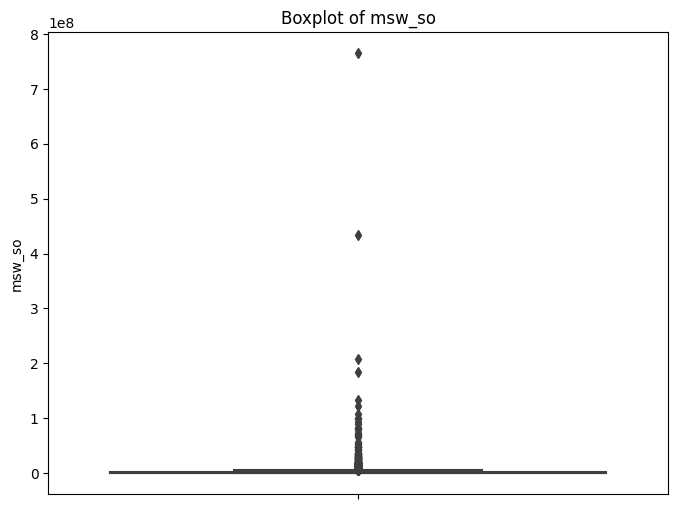

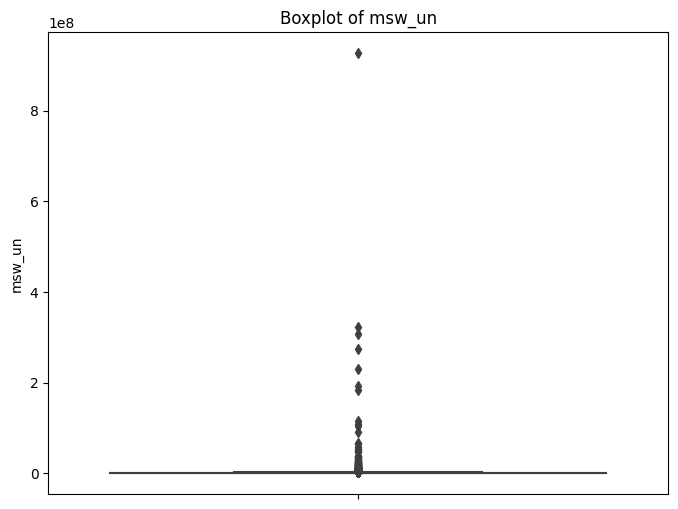

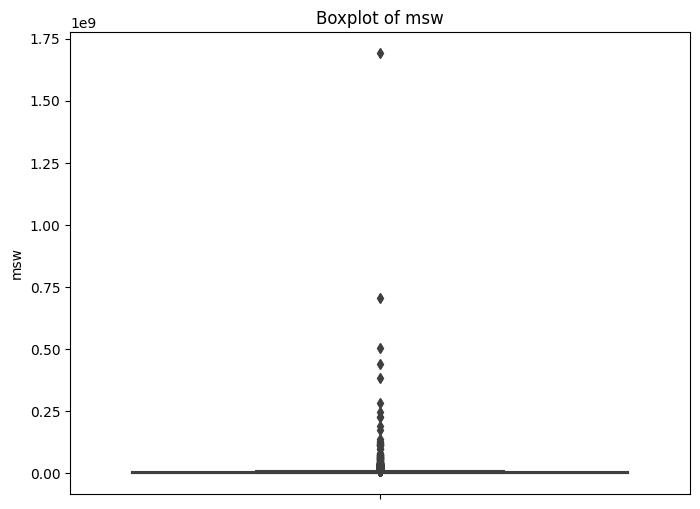

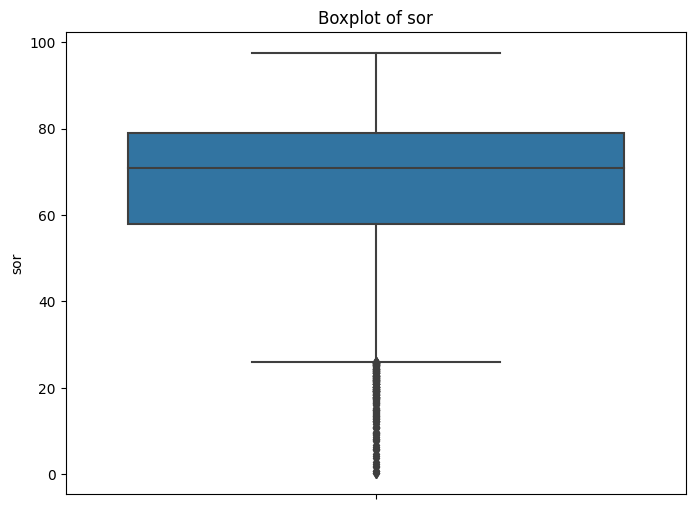

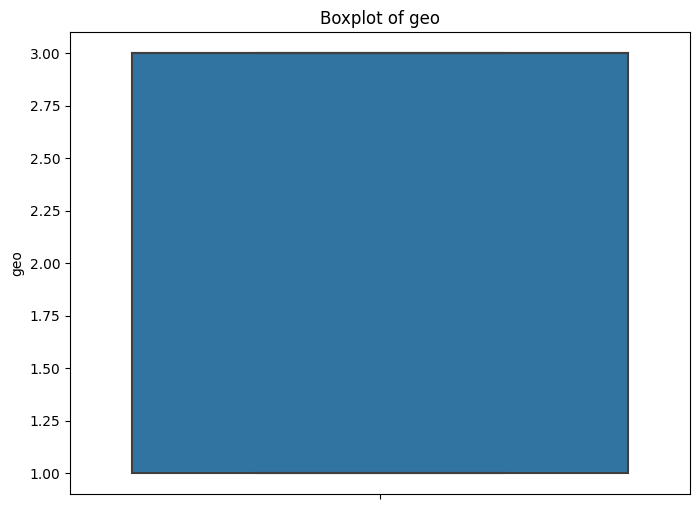

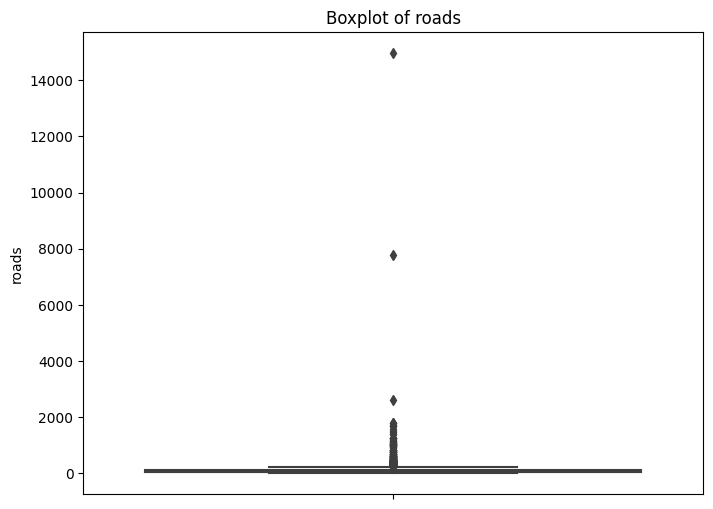

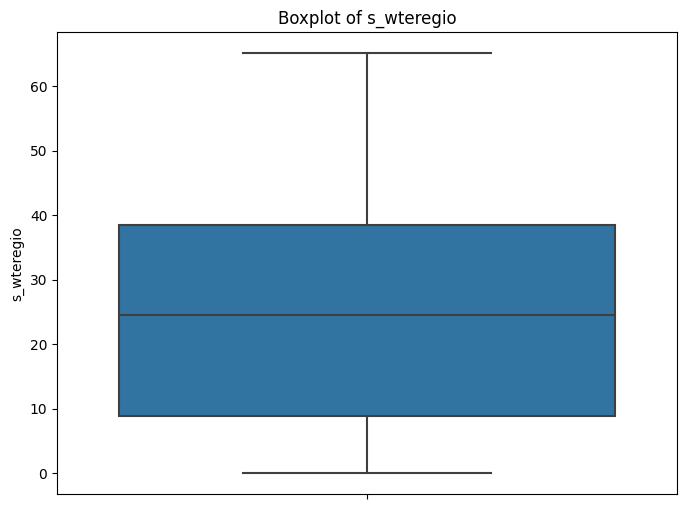

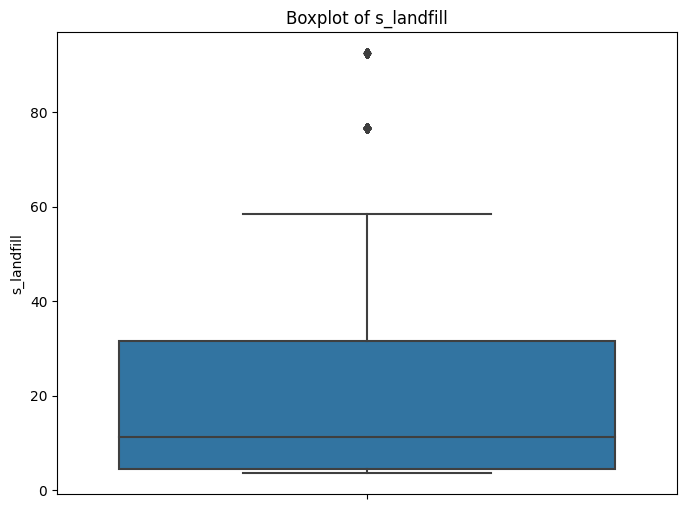

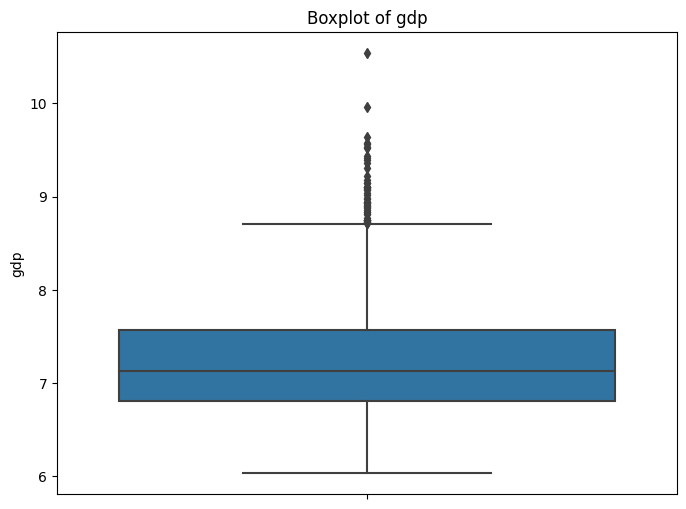

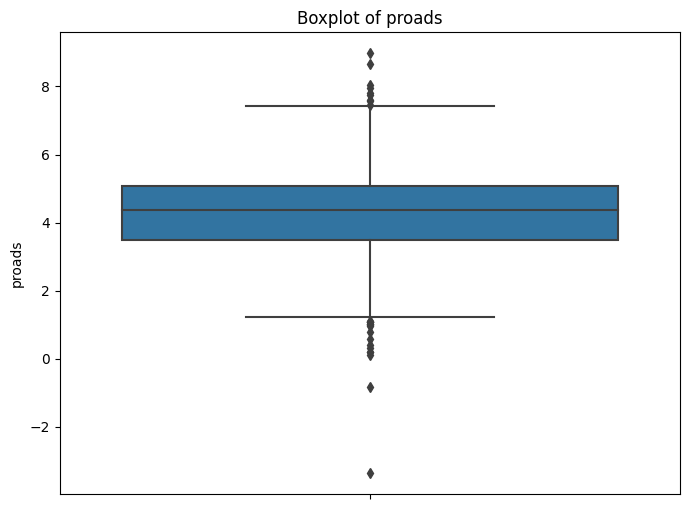

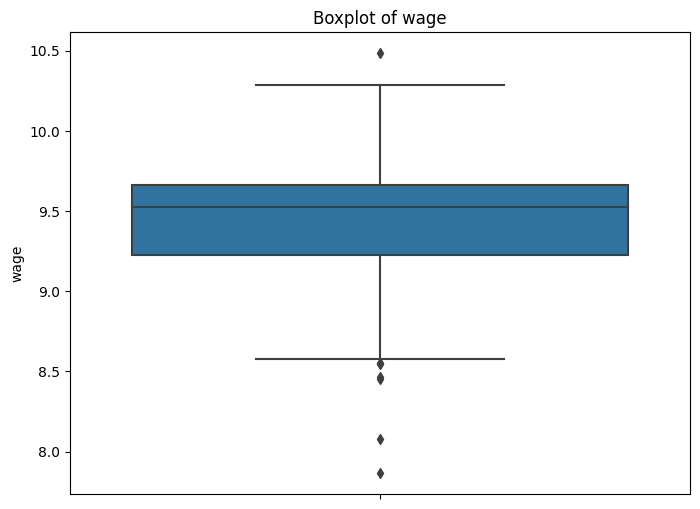

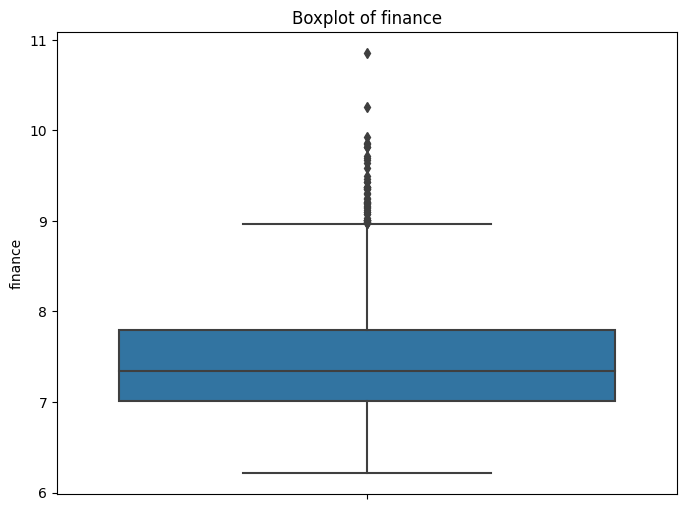

Feature: tc
Total Outliers: 75
Feature: cres
Total Outliers: 77
Feature: csor
Total Outliers: 53
Feature: istat
Total Outliers: 0
Feature: area
Total Outliers: 92
Feature: pop
Total Outliers: 20
Feature: alt
Total Outliers: 61
Feature: isle
Total Outliers: 22
Feature: sea
Total Outliers: 0
Feature: pden
Total Outliers: 84
Feature: wden
Total Outliers: 91
Feature: urb
Total Outliers: 0
Feature: d_fee
Total Outliers: 0
Feature: sample
Total Outliers: 0
Feature: organic
Total Outliers: 2
Feature: paper
Total Outliers: 35
Feature: glass
Total Outliers: 51
Feature: wood
Total Outliers: 30
Feature: metal
Total Outliers: 63
Feature: plastic
Total Outliers: 58
Feature: raee
Total Outliers: 40
Feature: texile
Total Outliers: 46
Feature: other
Total Outliers: 28
Feature: msw_so
Total Outliers: 23
Feature: msw_un
Total Outliers: 14
Feature: msw
Total Outliers: 21
Feature: sor
Total Outliers: 38
Feature: geo
Total Outliers: 0
Feature: roads
Total Outliers: 28
Feature: s_wteregio
Total Outliers: 0


In [6]:
# Define the threshold for identifying outliers (e.g., Z-score > 3 for extreme outliers)
z_score_threshold = 3

# Create an empty dictionary to store outlier information for each column
outliers_info = {}

# Iterate through numerical features and check for outliers
numerical_features = [features for features in data.columns if data[features].dtype != 'O']
for feature in numerical_features:
    # Calculate Z-scores for the feature
    z_scores = np.abs((data[feature] - data[feature].mean()) / data[feature].std())
    
    # Identify outliers based on the threshold
    outliers_mask = z_scores > z_score_threshold
    
    # Record information about outliers for the feature
    outliers_info[feature] = {
        'total_outliers': outliers_mask.sum(),
    }
    
   # create a boxplot to visualize outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y=feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Print information about outliers for each feature
for feature, info in outliers_info.items():
    print(f"Feature: {feature}")
    print(f"Total Outliers: {info['total_outliers']}")


Despite there being the presence of outliers, the data will not be further manipulated. The reason as to why the outliers are retained, is due to the fact that they may be revealing the disparity that is found with the nation of Italy, in particular the evident divide between North and South Italy. 

#### **Data Cleaning**
As there are inconsistencies in the data it will need to cleaned in order to proceed further with the analysis. <br> The missing values have been imputed using the KNN method.

In [7]:
# Imputing the missiing values using KNN

# Create a copy of your DataFrame to avoid modifying the original
df_imputed = data.copy()

# Specify the columns you want to impute
columns_to_impute = ['wood', 'texile', 'organic', 'roads', 'proads', 'gdp', 'finance', 'raee', 's_landfill', 's_wteregio', 'geo', 'wage', 'metal', 'other', 'csor', 'cres', 'plastic', 'glass', 'paper', 'urb', 'wden', 'pden', 'sea', 'alt', 'isle', 'area']

# Initialize the KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the selected columns
df_imputed[columns_to_impute] = imputer.fit_transform(df_imputed[columns_to_impute])


In the column `name`, where there was a missing value, it has now been replaced with `Unknown`, as shown in the code below.

In [8]:
# Fill missing values in name column with Unknown
df_imputed['name'].fillna('Unknown', inplace=True)

# Confirm there are no missing values
print(df_imputed.isnull().sum()) 

region        0
province      0
name          0
tc            0
cres          0
csor          0
istat         0
area          0
pop           0
alt           0
isle          0
sea           0
pden          0
wden          0
urb           0
fee           0
d_fee         0
sample        0
organic       0
paper         0
glass         0
wood          0
metal         0
plastic       0
raee          0
texile        0
other         0
msw_so        0
msw_un        0
msw           0
sor           0
geo           0
roads         0
s_wteregio    0
s_landfill    0
gdp           0
proads        0
wage          0
finance       0
dtype: int64


In order to improve readability and understanding, the names of the columns have been renamed using a function.

In [9]:
# Function to rename the columns

def rename_column(dataframe, old_column_name, new_column_name):
    """
    Rename a column in a Pandas DataFrame.

    Args:
        dataframe (pd.DataFrame): The DataFrame to rename the column in.
        old_column_name (str): The current name of the column to be renamed.
        new_column_name (str): The new name for the column.
    """
    if old_column_name in dataframe.columns:
        dataframe.rename(columns={old_column_name: new_column_name}, inplace=True)


In [10]:
# Renaming columns so that it's easier to understand
rename_column(df_imputed, 'cres', 'residual_cost')
rename_column(df_imputed, 'tc', 'cost_capita')
rename_column(df_imputed, 'csor', 'sorted_cost')
rename_column(df_imputed, 'pden', 'population_density')
rename_column(df_imputed, 'wden', 'waste_density')
rename_column(df_imputed, 'fee', 'fee_scheme')
rename_column(df_imputed, 'urb', 'urbanization_index')
rename_column(df_imputed, 'pop', 'population')
rename_column(df_imputed, 'msw_so', 'msw_sort')
rename_column(df_imputed, 'msw_un', 'msw_unsort')
rename_column(df_imputed, 'sor', 'stored_share')
rename_column(df_imputed, 'geo', 'geo_region')
rename_column(df_imputed, 'name', 'municipality')
rename_column(df_imputed, 'texile', 'textile')

In [11]:
# Define a custom mapping function for Geo Region
def map_geo_region(value):
    if value >= 1 and value < 2:
        return 'South'
    elif value >= 2 and value < 3:
        return 'Central'
    elif value >= 3:
        return 'North'
    else:
        return 'Unknown'

# Apply the custom mapping function to the 'geo_region' column
df_imputed['geo_region'] = df_imputed['geo_region'].apply(map_geo_region)


In [12]:
# Define a custom mapping function for 1 and 0 values
def map_binary(value):
    if value == 1 or (value > 0 and value < 1):
        return 'yes'
    else:
        return 'no'

# List of columns to map to 'yes' and 'no' values
columns_to_map = ['isle', 'sea', 'd_fee', 'sample']

# Apply the custom mapping function to the specified columns
for column in columns_to_map:
    df_imputed[column] = df_imputed[column].apply(map_binary)


In [13]:
# Define a custom mapping function for 'urbanization_index'
def map_urbanization(value):
    if value >= 1 and value < 2:
        return 'low'
    elif value >= 2 and value < 3:
        return 'medium'
    elif value >= 3:
        return 'high'
    else:
        return 'unknown'  
# Apply the custom mapping function to the 'urbanization_index' column
df_imputed['urbanization_index'] = df_imputed['urbanization_index'].apply(map_urbanization)


#### **Exploratory Data Understanding**

<Axes: >

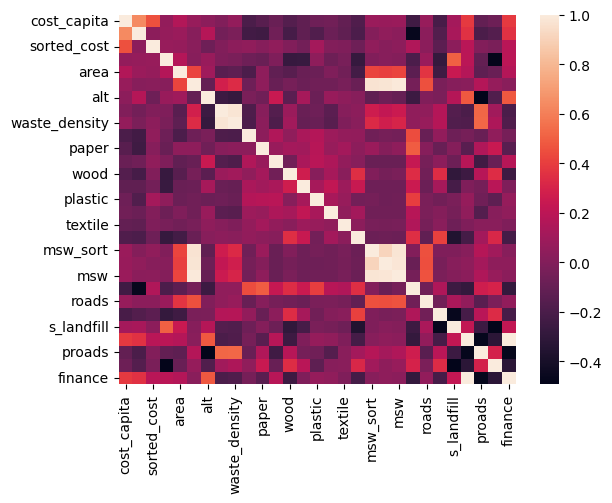

In [15]:
# Numerical Features

numerical_features = df_imputed.select_dtypes(include=['number']).columns.tolist()
sns.heatmap(df_imputed[numerical_features].corr())

In [29]:
corr_matrix = df_imputed[numerical_features].corr()
corr_matrix

,cost_capita,residual_cost,sorted_cost,istat,area,population,alt,population_density,waste_density,organic,paper,glass,wood,metal,plastic,raee,textile,other,msw_sort,msw_unsort,msw,stored_share,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
cost_capita,1.000000,0.637708,0.455147,0.058043,0.166411,0.070922,0.034307,-0.003399,0.058022,-0.197226,-0.149318,-0.089867,-0.165440,-0.120330,-0.072266,-0.058018,-0.111707,-0.177698,0.082793,0.076135,0.081150,-0.240091,0.071285,-0.207212,0.117440,0.386465,-0.109443,-0.076458,0.386465
residual_cost,0.637708,1.000000,0.033680,0.067189,0.082853,0.016916,0.172683,-0.052137,-0.021232,-0.235389,-0.245695,-0.064761,-0.216912,-0.121613,-0.175576,-0.079920,-0.122447,-0.193835,0.005663,0.044996,0.027168,-0.466329,0.029359,-0.166202,0.126489,0.357788,-0.200001,-0.161044,0.357788
sorted_cost,0.455147,0.033680,1.000000,0.071639,0.062974,0.026276,-0.072524,-0.005557,0.037787,0.048822,0.014322,0.049724,-0.002822,-0.054141,0.114406,-0.001042,-0.011486,-0.070760,0.049274,0.016940,0.032819,0.156502,0.029240,-0.135257,0.032797,0.184383,-0.001377,-0.031076,0.184383
istat,0.058043,0.067189,0.071639,1.000000,0.168634,0.016016,0.075322,-0.008824,-0.029985,-0.070411,-0.089067,-0.010358,-0.276036,-0.265756,0.043176,-0.075253,-0.035785,-0.281618,-0.005149,0.017467,0.007146,-0.189709,0.082318,-0.283380,0.501865,0.191435,-0.108994,-0.485469,0.191435
area,0.166411,0.082853,0.062974,0.168634,1.000000,0.417693,0.097372,-0.146120,-0.125550,-0.190459,0.038284,-0.113732,-0.151481,-0.086650,-0.079584,-0.009365,-0.056245,-0.225344,0.420169,0.401471,0.419928,-0.133495,0.369400,-0.242522,0.244358,0.171359,-0.125275,-0.085967,0.171359
population,0.070922,0.016916,0.026276,0.016016,0.417693,1.000000,-0.103748,0.282952,0.334625,-0.067933,0.041603,-0.091810,-0.038480,-0.078564,-0.062751,-0.066132,-0.034567,-0.088449,0.967785,0.973024,0.993305,-0.048039,0.454570,-0.028964,0.011030,0.023023,0.168873,0.062417,0.023023
alt,0.034307,0.172683,-0.072524,0.075322,0.097372,-0.103748,1.000000,-0.254329,-0.278025,-0.029176,-0.062337,0.246694,-0.137729,0.124236,-0.082373,0.074820,0.041954,0.017984,-0.121214,-0.074557,-0.098940,-0.256287,-0.004417,-0.024242,0.172333,0.477418,-0.492284,-0.173345,0.477418
population_density,-0.003399,-0.052137,-0.005557,-0.008824,-0.146120,0.282952,-0.254329,1.000000,0.974783,-0.184764,0.019300,-0.160713,0.081656,-0.086257,-0.070489,-0.141441,0.009216,0.033405,0.263353,0.223478,0.248062,0.046854,0.045499,0.169932,-0.165512,-0.199837,0.519379,0.104261,-0.199837
waste_density,0.058022,-0.021232,0.037787,-0.029985,-0.125550,0.334625,-0.278025,0.974783,1.000000,-0.194582,0.027144,-0.187863,0.105111,-0.096185,-0.088764,-0.149738,-0.010674,0.025976,0.325193,0.275235,0.305948,0.044706,0.071128,0.173006,-0.171697,-0.178379,0.527091,0.146551,-0.178379
organic,-0.197226,-0.235389,0.048822,-0.070411,-0.190459,-0.067933,-0.029176,-0.184764,-0.194582,1.000000,0.032608,0.157200,0.049082,0.131894,0.172188,0.085950,0.056640,0.050875,-0.064371,-0.040857,-0.053164,0.443819,-0.092127,0.053653,-0.070711,-0.039700,-0.086077,0.046603,-0.039700


### **Observation**

1. **Cost Variables**:

- `cost_capita` has a strong positive correlation with `residual_cost` (0.64), sorted_cost (0.46), and `finance` (0.39).
residual_cost has a strong positive correlation with sorted_cost (0.03) and a negative correlation with many waste-related variables (organic, paper, glass, wood, metal, plastic, raee, textile, other, msw_sort, msw_unsort, msw, stored_share).

2. **Waste Variables**:

- Waste-related variables (`organic`, `paper`, `glass`, `wood`, `metal`, `plastic`, `raee`, `textile`, `other`, `msw_sort`, `msw_unsort`, `msw`, `stored_share`) are generally negatively correlated with cost variables (cost_capita, residual_cost, sorted_cost, `finance`).

3. **Geographic and Demographic Variables**:

- `area` and `population` have positive correlations with some cost variables (`cost_capita`, `residual_cost`, `sorted_cost`).
- `roads` and `s_wteregio` have negative correlations with some cost variables.

4. **Economic Variables**:

- `gdp`, `proads`, `wage`, and `finance` are positively correlated with each other and also have positive correlations with some cost variables.

5. **Waste Density and Altitude**:

- `waste_density` has a strong positive correlation with `population_density` (0.97) and a strong negative correlation with `alt` (-0.28).

6. **Stored Share**:

- `stored_share` has a strong positive correlation with many waste-related variables (`organic`, `paper`, `glass`, `wood`, `metal`, `plastic`, `raee`, `textile`, `other`, `msw_sort`, `msw_unsort`, `msw`).

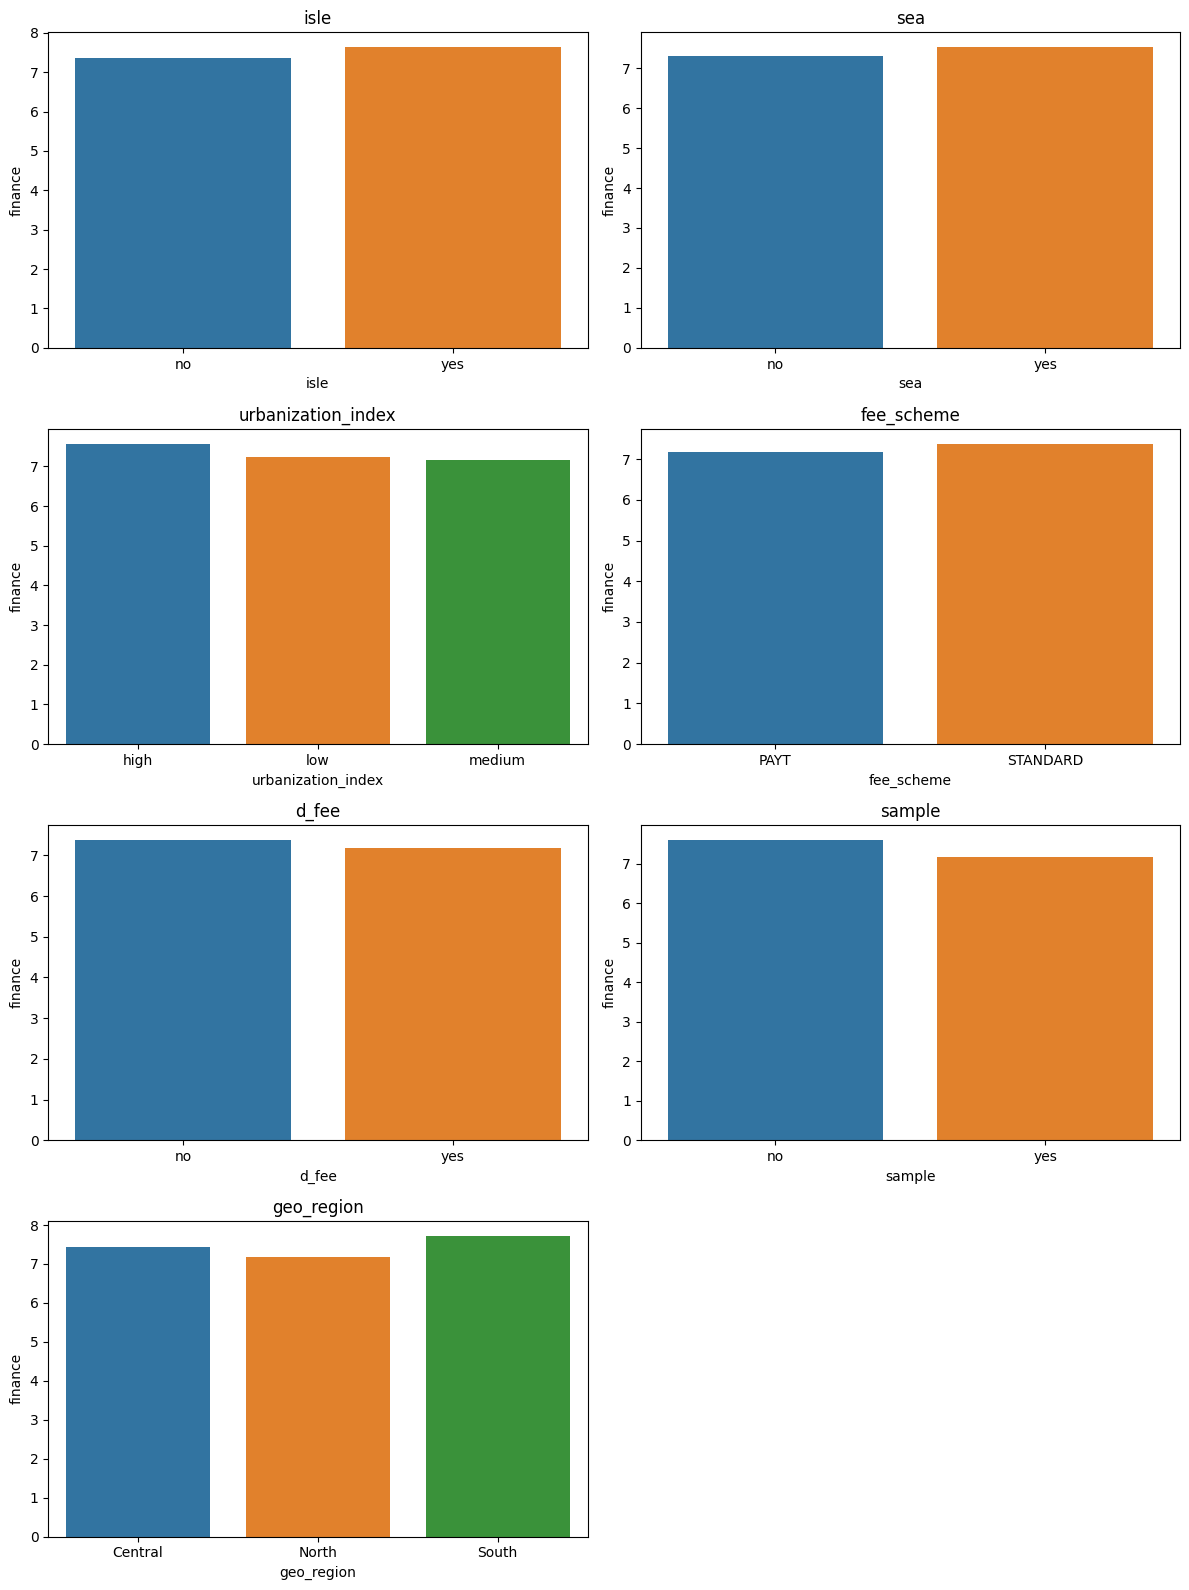

In [15]:
# Define the threshold for considering a feature as discrete
threshold_unique_values = 15

# Find discrete features based on the threshold
discrete_features = []
for feature in df_imputed.columns:
    unique_values_count = df_imputed[feature].nunique()
    if unique_values_count < threshold_unique_values:
        discrete_features.append(feature)

# Create a new DataFrame containing only the discrete features
discrete_df = df_imputed[discrete_features]

# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 16))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through discrete features
for i, feature in enumerate(discrete_features):
    ax = axes[i]
    median_finance = df_imputed.groupby(feature)['finance'].median()
    sns.barplot(x=median_finance.index, y=median_finance.values, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('finance')
    ax.set_title(feature)

# Remove empty subplots
if len(discrete_features) < num_rows * num_cols:
    for j in range(len(discrete_features), num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [16]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print(len(continuous_features))

29


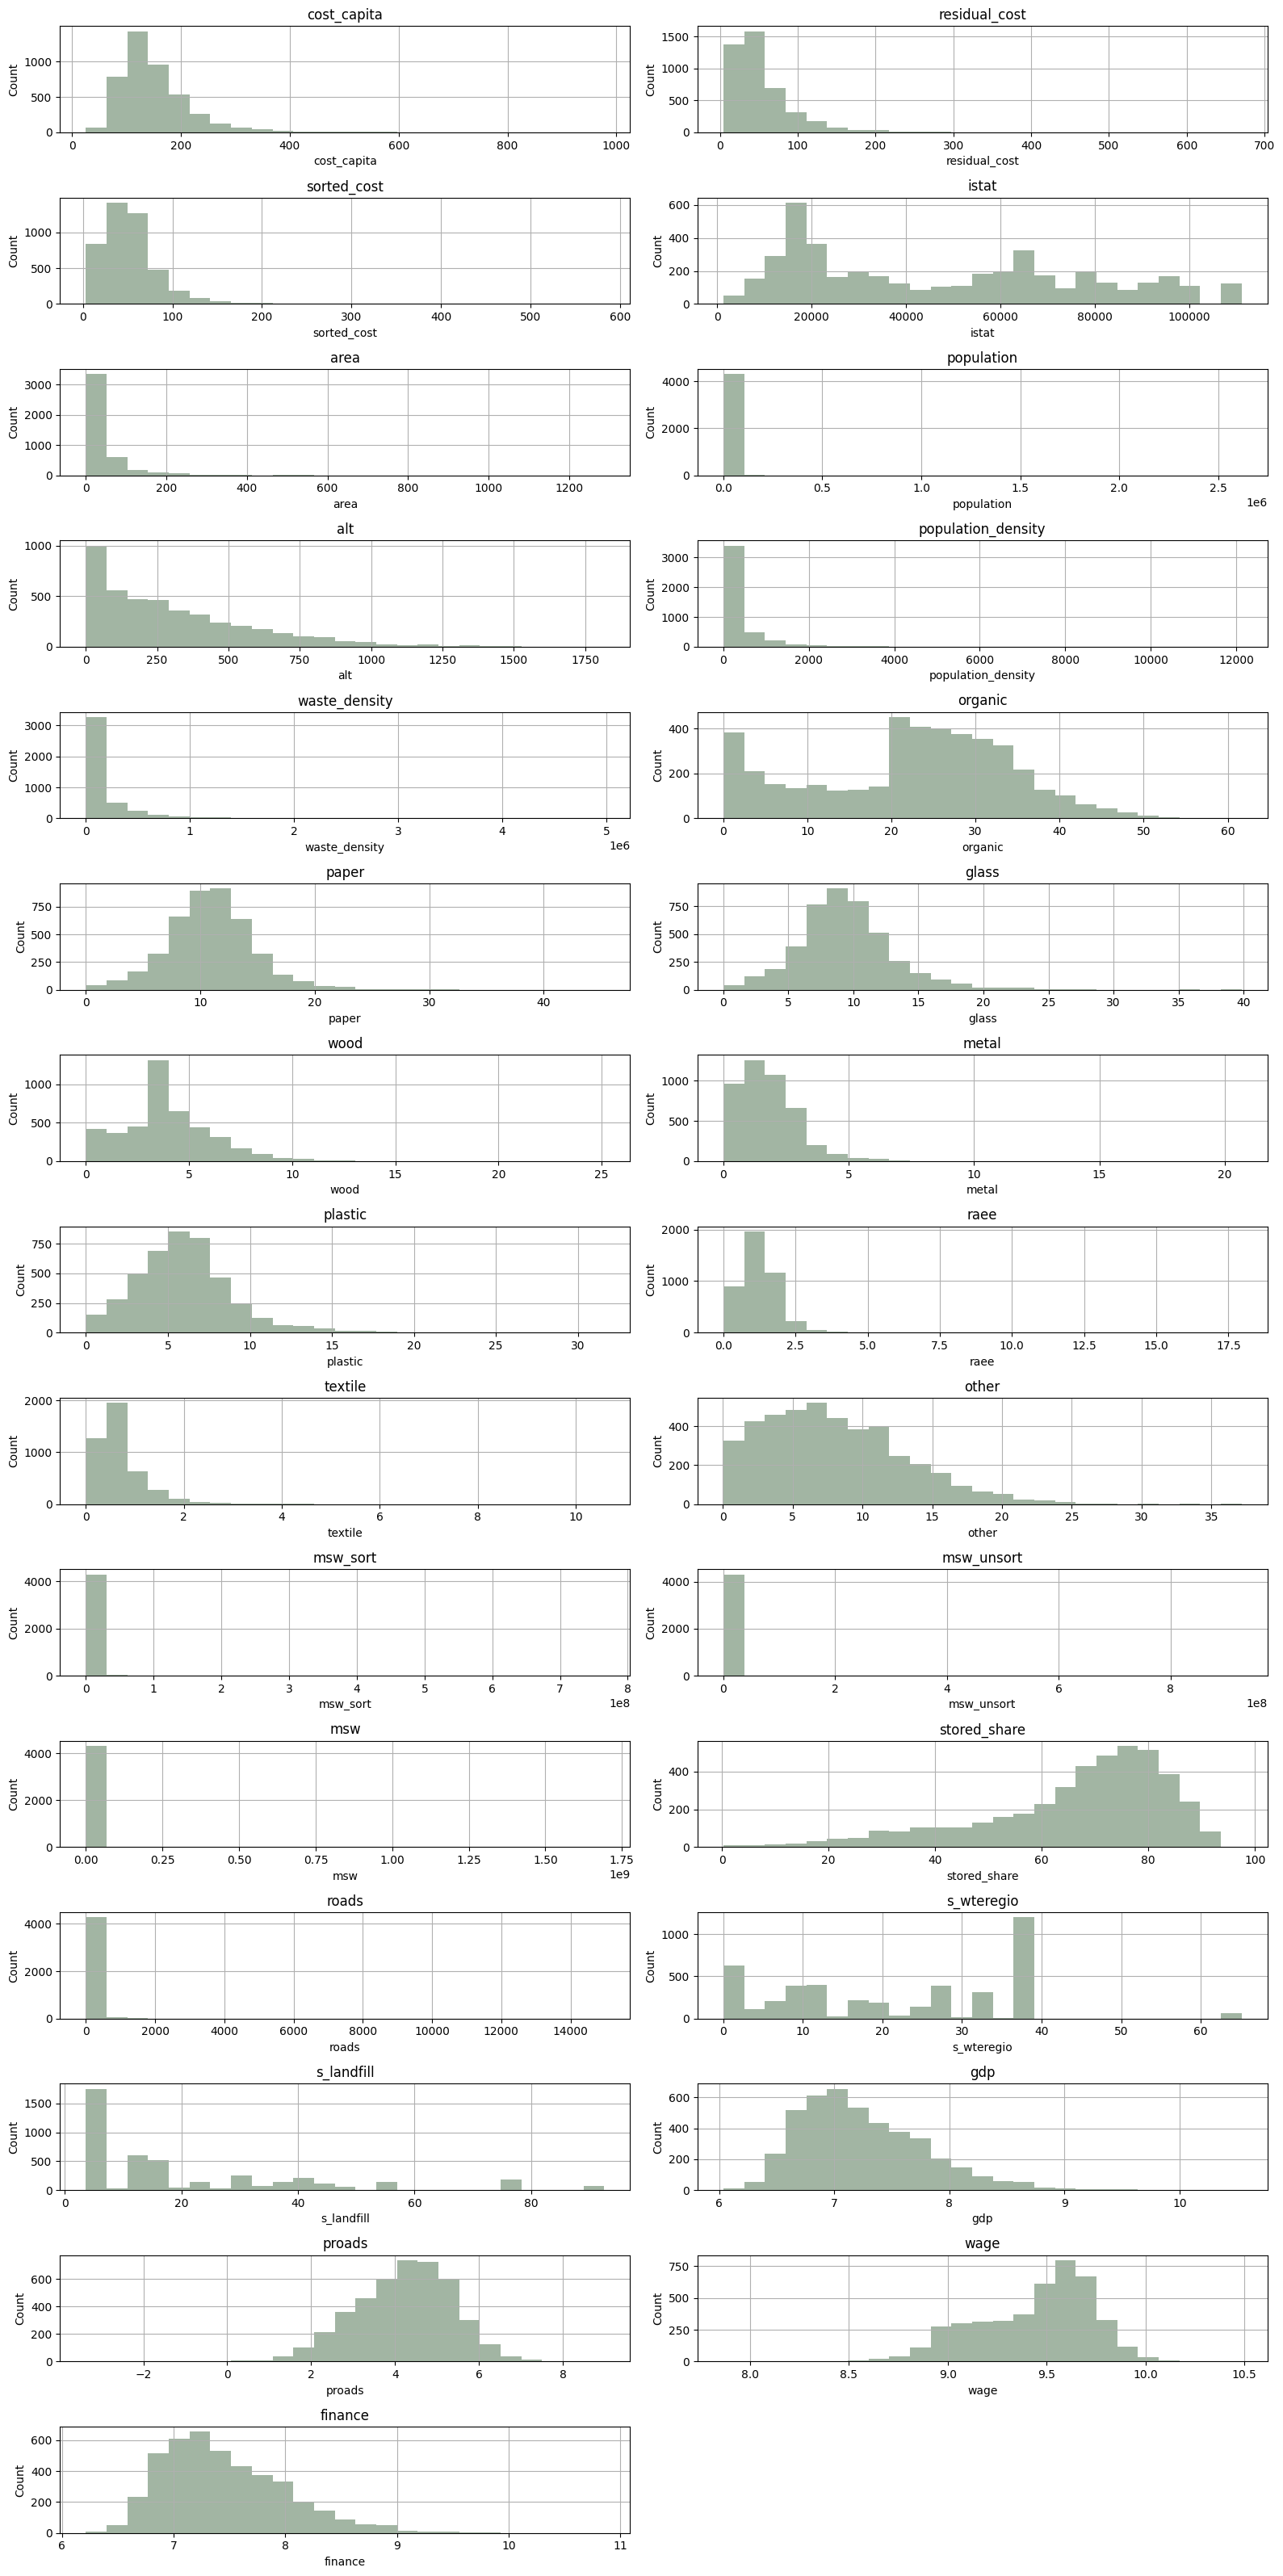

In [17]:
# Define the color
hist_color = "#a2b5a3"

# Create a function to plot histograms for continuous features
def plot_continuous_features(data, continuous_features, hist_color):
    num_features = len(continuous_features)
    num_rows = math.ceil(num_features / 2)
    num_cols = 2

    # Create the subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 32)) 

    # Flatten the axes for easy iteration
    axes = axes.flatten()

    for i, feature in enumerate(continuous_features):
        data[feature].hist(bins=25, color=hist_color, ax=axes[i])
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel("Count")
        axes[i].set_title(feature)

    # Remove any empty subplots
    if num_features < num_rows * num_cols:
        for j in range(num_features, num_rows * num_cols):
            fig.delaxes(axes[j])

    # Show the plots
    plt.tight_layout()
    plt.show()

# Call the function with your dataset and continuous_features
plot_continuous_features(df_imputed, continuous_features, hist_color)


##### **Cost Analysis**

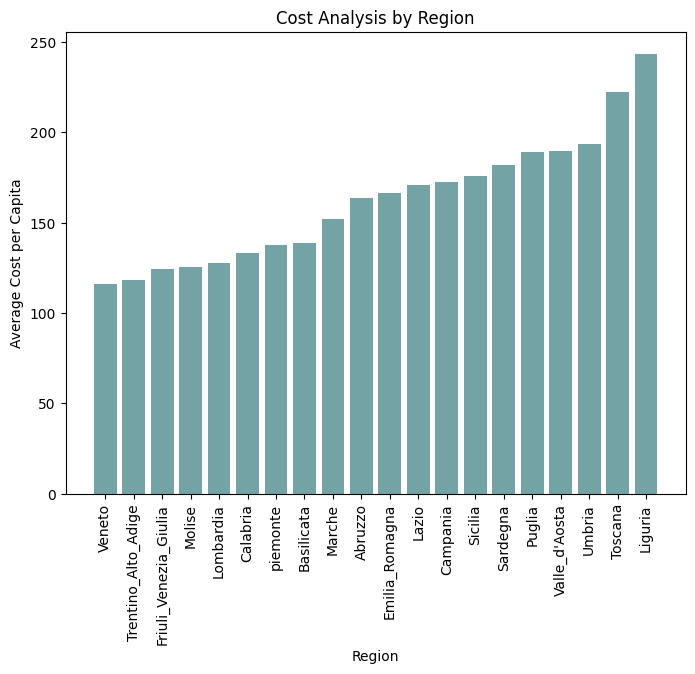

In [18]:
# Group the data by 'region' and calculate the average cost per capita
cost_by_region = df_imputed.groupby('region')['cost_capita'].mean().reset_index()

# Sort the DataFrame by 'cost_capita' in ascending order (low to high)
cost_by_region = cost_by_region.sort_values(by='cost_capita')

# Define the color
bar_color = "#74a3a6"

# Visualize the results using a bar chart with the specified color
plt.figure(figsize=(8, 6))
plt.bar(cost_by_region['region'], cost_by_region['cost_capita'], color=bar_color)
plt.xlabel('Region')
plt.ylabel('Average Cost per Capita')
plt.title('Cost Analysis by Region')
plt.xticks(rotation=90)
plt.show()


### **Observation**:

- The top 5 regions with the highest cost per capita are Liguria, Toscana, Umbria, Valle d'Aosta, and Puglia.
- The top 5 regions with the lowests cost per capita are Veneto, Trentino Alto Adige, Friuli Venezia Giulia, Molise, and Lombardia.

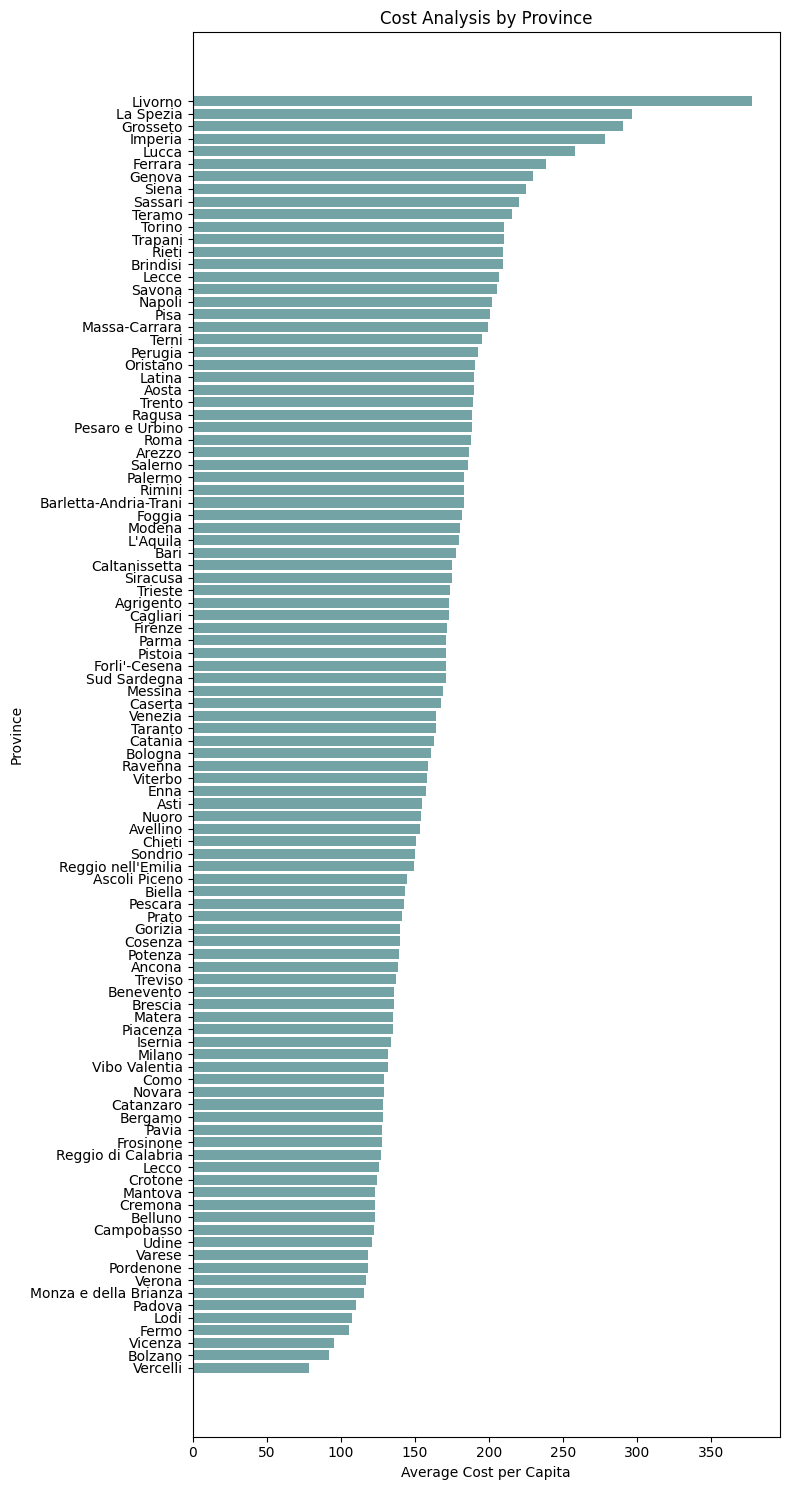

In [19]:
# Group the data by 'province' and calculate the average cost per capita
cost_by_province = df_imputed.groupby('province')['cost_capita'].mean().reset_index()

# Sort the DataFrame in descending order by 'cost_capita'
cost_by_province = cost_by_province.sort_values(by='cost_capita', ascending=True)

# Set the figure size and create the vertical bar chart
plt.figure(figsize=(8, 15)) 
plt.barh(cost_by_province['province'], cost_by_province['cost_capita'], color='#74a3a6')
plt.ylabel('Province')
plt.xlabel('Average Cost per Capita')
plt.title('Cost Analysis by Province')

# Add some padding and adjust layout
plt.tight_layout()

# Show the plot
plt.show()


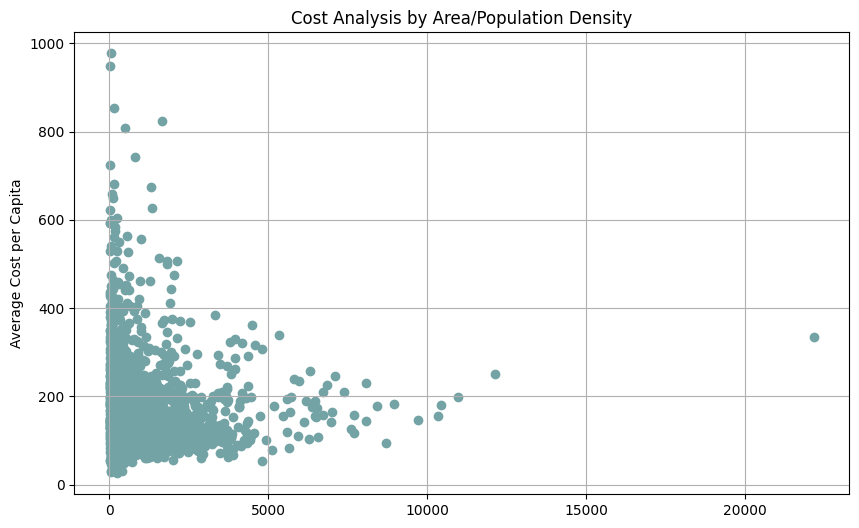

In [20]:
# Define a custom reverse mapping function for 'urbanization_index'
def reverse_map_urbanization(value):
    if value == 'low':
        return 1
    elif value == 'medium':
        return 2
    elif value == 'high':
        return 3
    else:
        return None

# Create a new column for the reversed urbanization index
df_imputed['urb_index'] = df_imputed['urbanization_index'].apply(reverse_map_urbanization)

# Create a new column that combines information about area/population density
df_imputed['area_pop_density'] = df_imputed['population_density'] * df_imputed['urb_index'] 

# Group the data by 'area_pop_density' and calculate the average cost per capita
cost_by_density = df_imputed.groupby('area_pop_density')['cost_capita'].mean().reset_index()

# Visualize the results using a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(cost_by_density['area_pop_density'], cost_by_density['cost_capita'], color='#74a3a6')
plt.ylabel('Average Cost per Capita')
plt.title('Cost Analysis by Area/Population Density')

# Add grid lines for clarity
plt.grid(True)

# Show the plot
plt.show()


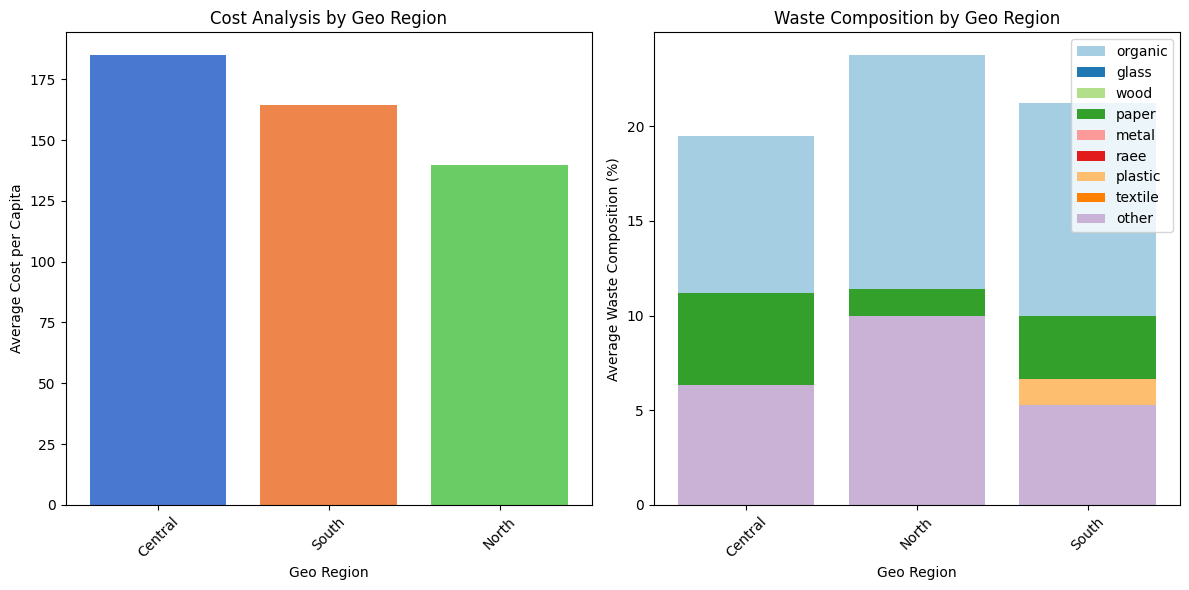

In [21]:
# Define a custom color palette
palette = sns.color_palette("Paired", 10)

# Group the data by 'geo' and calculate the average waste composition (adjust column names)
waste_composition_columns = ['organic', 'glass', 'wood', 'paper', 'metal', 'raee', 'plastic', 'textile', 'other']
avg_waste_composition = df_imputed.groupby('geo_region')[waste_composition_columns].mean().reset_index()

# Create subplots to compare costs and waste composition
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Cost Analysis by Geo Region (sorted from highest to lowest)
cost_by_region = df_imputed.groupby('geo_region')['cost_capita'].mean().reset_index()
cost_by_region = cost_by_region.sort_values(by='cost_capita', ascending=False)

# Define a custom palette
custom_palette = sns.color_palette("muted")

axes[0].bar(cost_by_region['geo_region'], cost_by_region['cost_capita'], color=custom_palette)
axes[0].set_xlabel('Geo Region')
axes[0].set_ylabel('Average Cost per Capita')
axes[0].set_title('Cost Analysis by Geo Region')
axes[0].tick_params(axis='x', rotation=45)

# Plot Waste Composition by Geo Region with the custom color palette
for i, col in enumerate(waste_composition_columns):
    axes[1].bar(avg_waste_composition['geo_region'], avg_waste_composition[col], label=col, color=palette[i])

axes[1].set_xlabel('Geo Region')
axes[1].set_ylabel('Average Waste Composition (%)')
axes[1].set_title('Waste Composition by Geo Region')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### **Observation**:
- The region with the highest cost per capita is Central Italy, followed by the South regions, and the North.

- The majority waste composition in the *Central Region* and *North Region* of Italy include: organic, paper and other waste materials.

- In comparison, the majority waste composition in the *South Region* of Italy includes: organic, paper, other as well as plastic waste.